In [255]:
# Imports

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns



# load data
data = pd.read_csv('Womens_Clothing_E-Commerce_Reviews.csv')
data = data.dropna(subset=['Review Text', 'Recommended IND'])

In [256]:
data.head(3)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses


In [257]:
# Goal: predict if a product was recommented or not by a custumer based on their review text.

In [258]:
# shuffling for better accuracy
def shuffling(training_images, labels):
    np.random.seed(1111) 
    ind_shuffled = np.random.permutation(len(training_images))

    images_shuffled = [training_images[i] for i in ind_shuffled]
    labels_shuffled = [labels[i] for i in ind_shuffled] # shuffle labels in the same order
    return np.array(images_shuffled), np.array(labels_shuffled)

# splitting data into train and validation
def partitioning(shuffled_training_images, shuffled_training_labels):
    
    num_valid = int((len(shuffled_training_images))/ 100)*20 # set aside 20% for validation

    images_valid = shuffled_training_images[0:num_valid]
    labels_valid = shuffled_training_labels[0:num_valid]

    images_train = shuffled_training_images[num_valid:]
    labels_train = shuffled_training_labels[num_valid:]

    return np.array(images_valid), np.array(labels_valid), np.array(images_train), np.array(labels_train)


# function for checking accuracy
def evaluation_metric(true_labels, predicted_labels):
    n = len(true_labels)
    s = (1/n) * np.sum(true_labels == predicted_labels)
    return s

def words_in_texts(words, texts):
    # Convert each review text to lowercase before checking for word presence
    indicator_array = np.array([texts.str.lower().str.contains(word.lower(), case=False, na=False) for word in words]).T.astype(int)
    return indicator_array

In [259]:
# Shuffle and partition the data
data_text_shuffled, data_labels_shuffled = shuffling(data['Review Text'].values, data['Recommended IND'].values)
text_validation, labels_validation, text_train, labels_train = partitioning(data_text_shuffled, data_labels_shuffled)

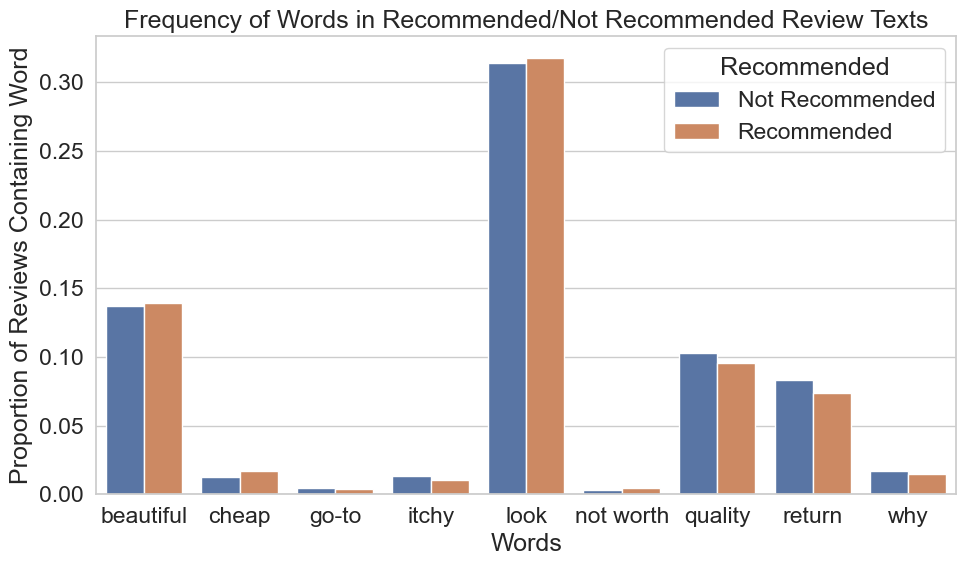

In [260]:
# Words for the bar plot

selected_words_bar = ['cheap', 'itchy', 'why', 'return', 'look', 'beautiful', 'go-to', 'not worth', 'quality'] # Generate features for the bar plot


indicator_data = pd.DataFrame(words_in_texts(selected_words_bar, data['Review Text']), columns=selected_words_bar)
indicator_data['Recommended'] = data['Recommended IND'].replace({1: 'Recommended', 0: 'Not Recommended'})

# Melt the DataFrame for the bar plot
melted_data = indicator_data.melt('Recommended', var_name='Words', value_name='Presence')

# Calculate proportions for the bar plot
word_proportions = (
    melted_data
    .groupby(['Words', 'Recommended'])
    .mean()
    .reset_index()
)

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=word_proportions, x='Words', y='Presence', hue='Recommended')
plt.xlabel("Words")
plt.ylabel("Proportion of Reviews Containing Word")
plt.title("Frequency of Words in Recommended/Not Recommended Review Texts")
plt.tight_layout()
plt.show()

In [261]:
# Words for the model
selected_words_model = ['cheap', 'itchy', 'why', 'return', 'look', 'beautiful', 'go-to', 'not worth', 'quality']  # You can change this list as needed

In [262]:
# Create feature matrices for the model training and predictions

X_train = words_in_texts(selected_words_model, pd.Series(text_train))
X_train = pd.DataFrame(X_train, columns=selected_words_model)
Y_train = np.array(labels_train)


X_validation = words_in_texts(selected_words_model, pd.Series(text_validation))
X_validation = pd.DataFrame(X_validation, columns=selected_words_model)
Y_validation = np.array(labels_validation)


# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

# Predictions and evaluation on training data
train_predictions = model.predict(X_train)
training_accuracy = evaluation_metric(Y_train, train_predictions)
print(f"Training Accuracy: {training_accuracy}")

# Predictions and evaluation on validation data
validation_predictions = model.predict(X_validation)
validation_accuracy = evaluation_metric(Y_validation, validation_predictions)
print(f"Validation Accuracy: {validation_accuracy}")

Training Accuracy: 0.8292036863307765
Validation Accuracy: 0.831858407079646


In [263]:
# tokenize the text
# TF-IDF

model.coef_
# understand what the numbers mean

array([[-1.99256604, -0.68743252, -0.33167584, -1.74326621, -0.48831097,
         0.32939959,  1.15674216, -2.37731809, -0.28870455]])